# Setup

In [62]:
import pandas as pd
from scipy import stats

In [63]:
import seaborn as sns

In [64]:
import numpy as np

# Laod Data

In [65]:
filename = './output02.csv'
df = pd.read_csv(filename, header=0, index_col=0)
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,8,4,1,0.090909,[ 0.11943819 0.05346557 0.07014093 0.009255...,[ 0.02737059 0.05008292 0.14684474 -0.024978...,both,0.520467,2.948766,0.629
11,2,LowIOS,1,8,1,0.125000,[-0.02357543 -0.12109289 0.21683958 -0.104704...,[ 0.09778938 0.02801418 0.19070491 -0.054827...,both,0.698260,3.752620,0.731
13,6,HighIOS,3,1,0,0.000000,[ 0.00887019 -0.07493114 0.19292825 -0.068387...,[ 0.24672021 -0.06143744 0.16993149 -0.076877...,both,1.061228,6.097061,0.320
17,3,LowIOS,7,7,3,0.272727,[ 9.24505740e-02 7.80474022e-02 1.51948884e-...,[ 0.11519082 0.04175487 0.12056322 0.037018...,both,0.376340,2.162843,0.805
22,6,HighIOS,2,8,2,0.250000,[ 0.0311171 0.09546094 0.3110742 0.003598...,[ 0.11047471 0.06481349 0.2719891 -0.048207...,both,0.473944,2.713301,0.823


In [66]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    20
LowIOS     26
Neither     4
dtype: int64

In [67]:
df = df.dropna()
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,8,4,1,0.090909,[ 0.11943819 0.05346557 0.07014093 0.009255...,[ 0.02737059 0.05008292 0.14684474 -0.024978...,both,0.520467,2.948766,0.629
11,2,LowIOS,1,8,1,0.125000,[-0.02357543 -0.12109289 0.21683958 -0.104704...,[ 0.09778938 0.02801418 0.19070491 -0.054827...,both,0.698260,3.752620,0.731
13,6,HighIOS,3,1,0,0.000000,[ 0.00887019 -0.07493114 0.19292825 -0.068387...,[ 0.24672021 -0.06143744 0.16993149 -0.076877...,both,1.061228,6.097061,0.320
17,3,LowIOS,7,7,3,0.272727,[ 9.24505740e-02 7.80474022e-02 1.51948884e-...,[ 0.11519082 0.04175487 0.12056322 0.037018...,both,0.376340,2.162843,0.805
22,6,HighIOS,2,8,2,0.250000,[ 0.0311171 0.09546094 0.3110742 0.003598...,[ 0.11047471 0.06481349 0.2719891 -0.048207...,both,0.473944,2.713301,0.823


In [68]:
df.groupby('IOS_group').size()

IOS_group
HighIOS    20
LowIOS     26
Neither     4
dtype: int64

# Descriptive Statistics on Overlap Score

In [69]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,26.0,0.117414,0.077646,0.0,0.077692,0.127717,0.166667,0.272727


In [70]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,20.0,0.071816,0.092841,0.0,0.0,0.0,0.139205,0.25


# Visualization

## Overlapping Score

### Overlapping Score: Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

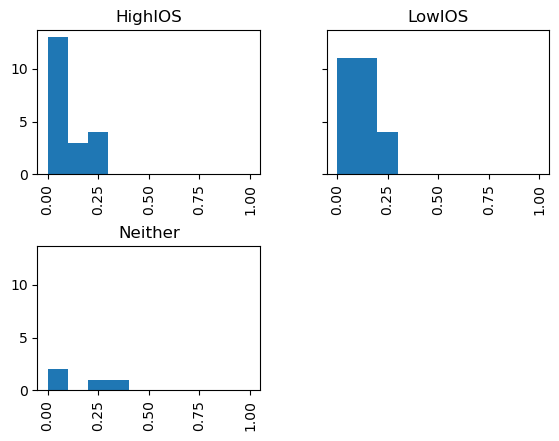

In [71]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Overlapping Score: Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

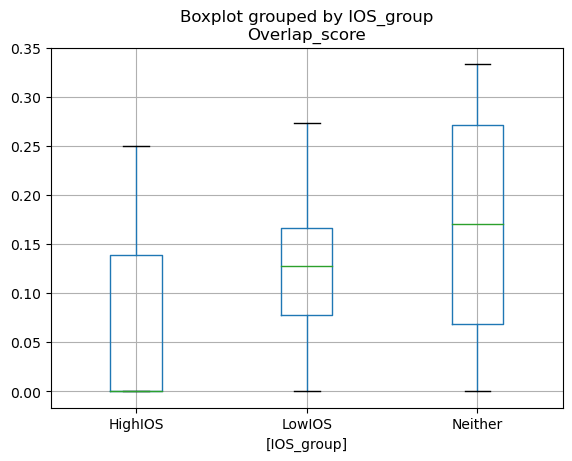

In [72]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

### Overlapping Score: Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

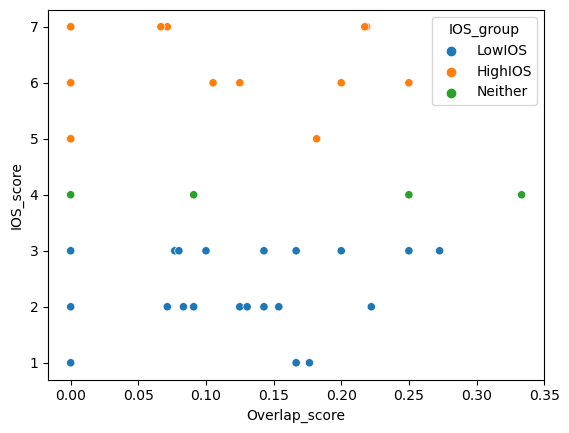

In [73]:
sns.scatterplot(x='Overlap_score', y='IOS_score', hue='IOS_group', data=df)

## Euclidean Distance

### Euclidean Distance: Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

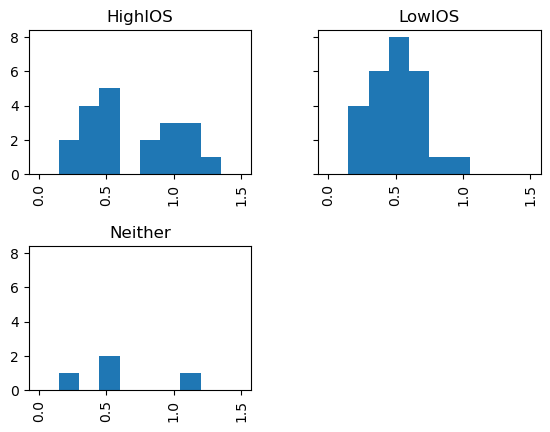

In [74]:
df['euclidean_distance'].hist(by=df['IOS_group'], range=[0, 1.5], sharey=True)

### Euclidean Distance: Boxplot

<Axes: title={'center': 'euclidean_distance'}, xlabel='[IOS_group]'>

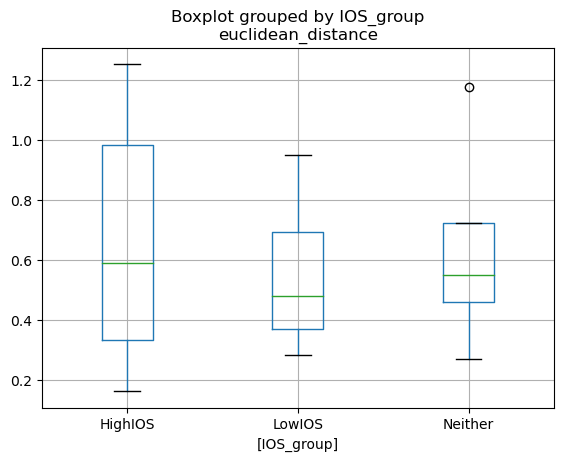

In [75]:
df.boxplot(column=['euclidean_distance'], by=['IOS_group'])

### Euclidean Distance: Scatter plot

<Axes: xlabel='euclidean_distance', ylabel='IOS_score'>

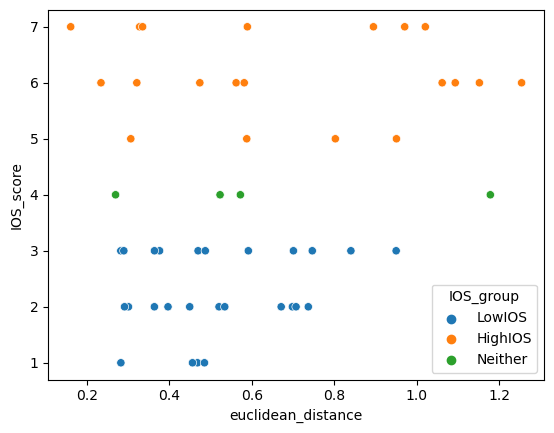

In [76]:
sns.scatterplot(x='euclidean_distance', y='IOS_score', hue='IOS_group', data=df)

## Manhattan Distance

### Manhattan Distance: Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

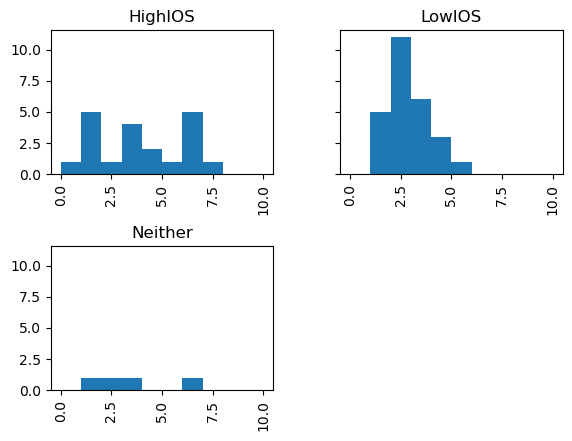

In [77]:
df['manhattan_distance'].hist(by=df['IOS_group'], range=[0, 10], sharey=True)

### Manhattan Distance: Boxplot

<Axes: title={'center': 'manhattan_distance'}, xlabel='[IOS_group]'>

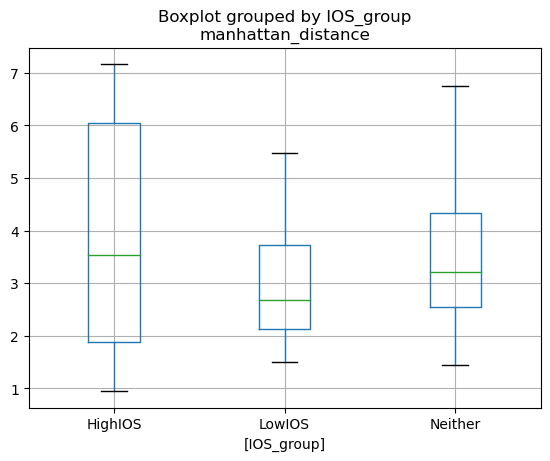

In [78]:
df.boxplot(column=['manhattan_distance'], by=['IOS_group'])

### Manhattan Distance: Scatter plot

<Axes: xlabel='manhattan_distance', ylabel='IOS_score'>

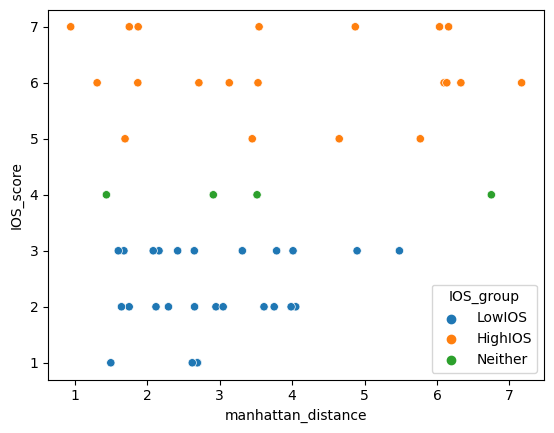

In [79]:
sns.scatterplot(x='manhattan_distance', y='IOS_score', hue='IOS_group', data=df)

## Cosine Similarity

### Cosine Similarity: Histogram

array([[<Axes: title={'center': 'HighIOS'}>,
        <Axes: title={'center': 'LowIOS'}>],
       [<Axes: title={'center': 'Neither'}>, <Axes: >]], dtype=object)

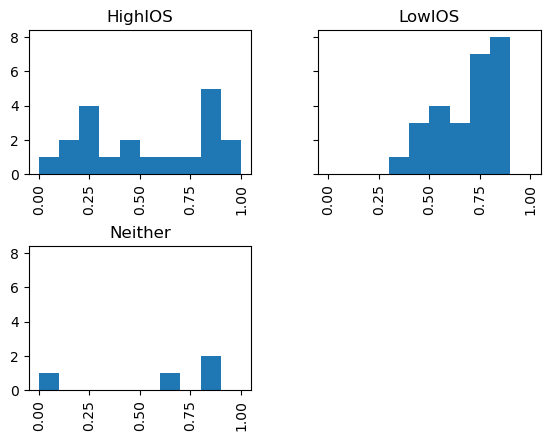

In [80]:
df['cosine_similarity'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Cosine Similarity: Boxplot

<Axes: title={'center': 'cosine_similarity'}, xlabel='[IOS_group]'>

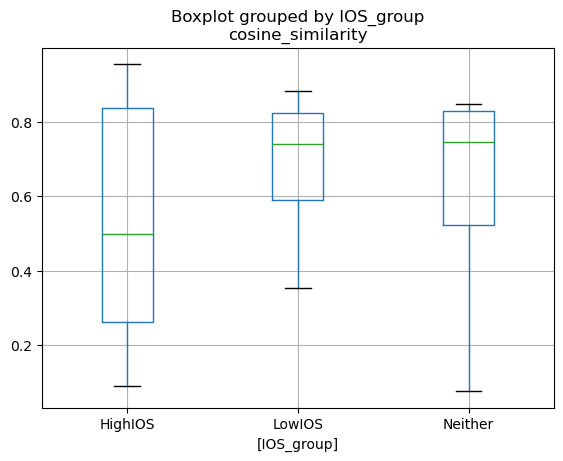

In [81]:
df.boxplot(column=['cosine_similarity'], by=['IOS_group'])

### Cosine Similarity: Scatter plot

<Axes: xlabel='cosine_similarity', ylabel='IOS_score'>

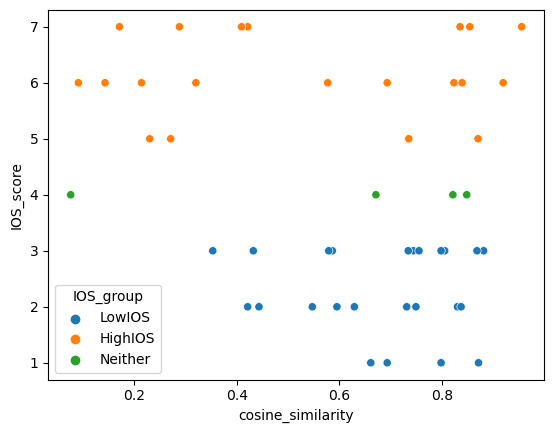

In [82]:
sns.scatterplot(x='cosine_similarity', y='IOS_score', hue='IOS_group', data=df)

# Check the Outliers

In [83]:
df.loc[df['Overlap_score'] == 1, :]

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,


# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test
The author had planned:
- sample size: 51 for each group
- alpha: 0.05
- effect size: 0.5
- power: 0.8

In [84]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

### Overlapping Magnitude

In [85]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='greater') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-1.771097213559083, pvalue=0.9575909988730523, df=36.840456547081125)

In [86]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative='less') # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-1.771097213559083, pvalue=0.0424090011269477, df=36.840456547081125)

### Euclidean Distance

In [87]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative='less')

TtestResult(statistic=1.944079633532404, pvalue=0.9689164757555071, df=27.53894057378704)

In [88]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative='greater')

TtestResult(statistic=1.944079633532404, pvalue=0.031083524244492934, df=27.53894057378704)

### Manhattan Distance

In [89]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative='less')

TtestResult(statistic=2.125646011846273, pvalue=0.9785622279879714, df=26.866404294460605)

In [90]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative='greater')

TtestResult(statistic=2.125646011846273, pvalue=0.021437772012028577, df=26.866404294460605)

### Cosine Similarity

In [91]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative='greater')

TtestResult(statistic=-2.144054951174973, pvalue=0.9793361794590205, df=26.607695767351377)

In [92]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative='less')

TtestResult(statistic=-2.144054951174973, pvalue=0.020663820540979445, df=26.607695767351377)

In [93]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative='two-sided')

TtestResult(statistic=-2.144054951174973, pvalue=0.04132764108195889, df=26.607695767351377)

In [94]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').mean()

,cosine_similarity
IOS_group,
HighIOS,0.532900
LowIOS,0.692615
Neither,0.604000


In [95]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').std()

,cosine_similarity
IOS_group,
HighIOS,0.303922
LowIOS,0.155554
Neither,0.360508


In [97]:
sentences_token_self_df = pd.read_csv('./sentences_token_self_df.csv', header=0, index_col=0)
sentences_token_self_df.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
MID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,怒る,聞く,計画,する,動く,行動,ある,いる,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,遊ぶ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,いう,話しかける,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cols = sentences_token_self_df.columns
sentences_token_self_df['token_self'] = sentences_token_self_df.values.tolist()
sentences_token_self_df = sentences_token_self_df.drop(cols, axis=1)
sentences_token_self_df.head()

,token_self
MID,
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,"[怒る, 聞く, 計画, する, 動く, 行動, ある, いる, nan, nan, nan..."
5,"[遊ぶ, nan, nan, nan, nan, nan, nan, nan, nan, n..."
8,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,"[いう, 話しかける, nan, nan, nan, nan, nan, nan, nan,..."


In [99]:
df_merged = pd.merge(df[['IOS_group', 'cosine_similarity']], sentences_token_self_df, how='inner', left_index=True, right_index=True)
df_merged.head()

,IOS_group,cosine_similarity,token_self
MID,,,
3,LowIOS,0.629,"[怒る, 聞く, 計画, する, 動く, 行動, ある, いる, nan, nan, nan..."
11,LowIOS,0.731,"[思う, 思う, nan, nan, nan, nan, nan, nan, nan, na..."
13,HighIOS,0.320,"[やる, やる, 思う, 入る, nan, nan, nan, nan, nan, nan,..."
17,LowIOS,0.805,"[接す, やり遂げる, 考える, 行動, する, 動く, なる, nan, nan, nan..."
22,HighIOS,0.823,"[買う, 調べる, nan, nan, nan, nan, nan, nan, nan, n..."


In [102]:
sentences_token_target_df = pd.read_csv('./sentences_token_target_df.csv', header=0, index_col=0)
sentences_token_target_df.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
MID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,怒る,仕事,抱え込む,チェック,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,回答,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cols = sentences_token_target_df.columns
sentences_token_target_df['token_target'] = sentences_token_target_df.values.tolist()
sentences_token_target_df= sentences_token_target_df.drop(cols, axis=1)
sentences_token_target_df.head()

,token_target
MID,
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,"[怒る, 仕事, 抱え込む, チェック, nan, nan, nan, nan, nan, ..."
5,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,"[回答, nan, nan, nan, nan, nan, nan, nan, nan, n..."
9,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [104]:
df_merged = pd.merge(df_merged, sentences_token_target_df, how='inner', left_index=True, right_index=True)
df_merged.head()

,IOS_group,cosine_similarity,token_self,token_target
MID,,,,
3,LowIOS,0.629,"[怒る, 聞く, 計画, する, 動く, 行動, ある, いる, nan, nan, nan...","[怒る, 仕事, 抱え込む, チェック, nan, nan, nan, nan, nan, ..."
11,LowIOS,0.731,"[思う, 思う, nan, nan, nan, nan, nan, nan, nan, na...","[仕事, ある, 思う, やる, する, 一緒, 出かける, 接する, nan, nan, ..."
13,HighIOS,0.320,"[やる, やる, 思う, 入る, nan, nan, nan, nan, nan, nan,...","[する, nan, nan, nan, nan, nan, nan, nan, nan, n..."
17,LowIOS,0.805,"[接す, やり遂げる, 考える, 行動, する, 動く, なる, nan, nan, nan...","[ミス, 許す, 言う, 守る, 考える, 行動, する, 行動, nan, nan, na..."
22,HighIOS,0.823,"[買う, 調べる, nan, nan, nan, nan, nan, nan, nan, n...","[なる, 会う, 仕事, 休む, 買う, 調べる, 買う, 話しかける, する, 会う, n..."


In [107]:
# Low similarity @High_IOS
df_merged[df_merged['IOS_group'] == 'HighIOS'].sort_values(by='cosine_similarity', ascending=True).head(10)

,IOS_group,cosine_similarity,token_self,token_target
MID,,,,
177,HighIOS,0.091,"[逃げる, よる, nan, nan, nan, nan, nan, nan, nan, n...","[束縛, nan, nan, nan, nan, nan, nan, nan, nan, n..."
69,HighIOS,0.143,"[する, nan, nan, nan, nan, nan, nan, nan, nan, n...","[考える, 仕事, 営業, ある, nan, nan, nan, nan, nan, nan..."
92,HighIOS,0.171,"[叩く, 叩く, こもる, nan, nan, nan, nan, nan, nan, na...","[許す, 保証, する, 計画, する, いる, nan, nan, nan, nan, n..."
176,HighIOS,0.214,"[考える, nan, nan, nan, nan, nan, nan, nan, nan, ...","[あり, nan, nan, nan, nan, nan, nan, nan, nan, n..."
174,HighIOS,0.230,"[似る, ある, nan, nan, nan, nan, nan, nan, nan, na...","[する, 言う, 思い立つ, 行動, する, する, nan, nan, nan, nan,..."
85,HighIOS,0.271,"[尊敬, する, いく, いく, nan, nan, nan, nan, nan, nan,...","[気に入る, ある, 思う, nan, nan, nan, nan, nan, nan, n..."
157,HighIOS,0.288,"[話し掛ける, nan, nan, nan, nan, nan, nan, nan, nan...","[約束, する, 守る, nan, nan, nan, nan, nan, nan, nan..."
13,HighIOS,0.320,"[やる, やる, 思う, 入る, nan, nan, nan, nan, nan, nan,...","[する, nan, nan, nan, nan, nan, nan, nan, nan, n..."
153,HighIOS,0.409,"[傷つく, 当たる, 当たる, 疲れる, nan, nan, nan, nan, nan, ...","[会う, 仲違い, nan, nan, nan, nan, nan, nan, nan, n..."


In [109]:
# High similarity @Low_IOS
df_merged[df_merged['IOS_group'] == 'LowIOS'].sort_values(by='cosine_similarity', ascending=False).head(10)

,IOS_group,cosine_similarity,token_self,token_target
MID,,,,
83,LowIOS,0.881,"[持つ, 認識, する, 評価, する, 分かる, 仕事, 限る, 取り組む, ある, 抜く...","[つく, 話す, つく, 教える, 知る, 交換, する, ある, 聞く, 決める, 守る,..."
43,LowIOS,0.871,"[ある, 相談, 評価, 現れる, 辞める, やる, 生きる, 思い切る, 行動, 出来る,...","[養う, 判断, 間違う, 行動, ある, 出来る, nan, nan, nan, nan,..."
146,LowIOS,0.868,"[おこる, 威圧, ある, 怖がる, 与える, 仕事, こなす, 考える, 行動, する, ...","[なる, 言う, 一緒, いる, 疲れる, 仕事, こなす, 考える, 行動, する, 回答..."
99,LowIOS,0.837,"[返事, もらえる, する, 思う, 思い当たる, nan, nan, nan, nan, ...","[思う, 謝る, でる, nan, nan, nan, nan, nan, nan, nan..."
54,LowIOS,0.837,"[守る, 考える, おもう, 接する, できる, 心掛ける, 信用, する, する, ある,...","[思う, 会う, こぼす, ある, 言う, する, 料理, 参加, する, 参加, する, ..."
87,LowIOS,0.831,"[理解, ある, 思う, 思う, 仕事, やる, 考える, 行動, する, 仕事, 打ち解け...","[保てる, 関係, やる, 考える, 待つ, 関わる, nan, nan, nan, nan..."
91,LowIOS,0.830,"[囲む, 苦労, する, 受け止める, 思う, 言う, 否定, する, 思う, 苦しむ, 抵...","[する, ある, 話, する, なる, する, 感じる, いる, とる, 計画, する, 行..."
17,LowIOS,0.805,"[接す, やり遂げる, 考える, 行動, する, 動く, なる, nan, nan, nan...","[ミス, 許す, 言う, 守る, 考える, 行動, する, 行動, nan, nan, na..."
93,LowIOS,0.798,"[する, やる, 通す, する, する, nan, nan, nan, nan, nan, ...","[裏切る, 取る, 浮気, する, nan, nan, nan, nan, nan, nan..."


### Post hoc Power Analysis

In [41]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 20
Num. of group L: 26


In [42]:
def cohens_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    s1 = x1.std()
    s2 = x2.std()
    s = np.sqrt((n1*np.square(s1) + n2*np.square(s2)) / (n1 + n2))
    d = np.abs(x1_mean - x2_mean) / s
    return d

In [43]:
euclidean_d = cohens_d(groupH['euclidean_distance'], groupL['euclidean_distance'])
print('Cohen''s d (Euclidean distance): {:.4f}'.format(euclidean_d))
manhattan_d = cohens_d(groupH['manhattan_distance'], groupL['manhattan_distance'])
print('Cohen''s d (Manhattan distance): {:.4f}'.format(manhattan_d))
cosine_d = cohens_d(groupH['cosine_similarity'], groupL['cosine_similarity'])
print('Cohen''s d (Cosine similarity): {:.4f}'.format(cosine_d))

Cohens d (Euclidean distance): 0.6208
Cohens d (Manhattan distance): 0.6814
Cohens d (Cosine similarity): 0.6883


In [44]:
# Compute post hoc power powered by G*Power
print('Post hoc power (Euclidean distance): {:.4f}'.format(0.6591))
print('Post hoc power (Manhattan distance): {:.4f}'.format(0.7292))
print('Post hoc power (Cosine similarity): {:.4f}'.format(0.7368))

Post hoc power (Euclidean distance): 0.6591
Post hoc power (Manhattan distance): 0.7292
Post hoc power (Cosine similarity): 0.7368


## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores
The author had planned:
- sample size: 119, including participants who rated on the IOS scale as 4
- alpha: 0.05
- effect size: 0.3
- power: 0.93
- two-tailed


### Overlapping score

In [45]:
df.head(1)

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,8,4,1,0.090909,[ 0.11943819 0.05346557 0.07014093 0.009255...,[ 0.02737059 0.05008292 0.14684474 -0.024978...,both,0.520467,2.948766,0.629


In [46]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

In [47]:
res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=-0.22430480554849083, pvalue=0.11735181892172995)

### Euclidean Dsitance

In [48]:
euclidean_distance = df['euclidean_distance']
res = stats.spearmanr(iosscores, euclidean_distance)
res

SignificanceResult(statistic=0.22893291016668457, pvalue=0.10978171247622574)

### Manhattan Distance

In [49]:
manhattan_distance = df['manhattan_distance']
res = stats.spearmanr(iosscores, manhattan_distance)
res

SignificanceResult(statistic=0.2269816388249698, pvalue=0.11292646795711726)

### Cosine Similarity

In [50]:
cosine_similarity = df['cosine_similarity']
res = stats.spearmanr(iosscores, cosine_similarity)
res

SignificanceResult(statistic=-0.17646065889047152, pvalue=0.22025414270919622)

### Post hoc Power Analysis

In [51]:
print('Num. of Sumple of the IOS socre: ' + str(len(iosscores)))
print('Num. of Sumple of the Overlapping socre: ' + str(len(overlapscores)))

Num. of Sumple of the IOS socre: 50
Num. of Sumple of the Overlapping socre: 50


Achieved power: 0.382 (rho1 = 0.20)